## Project Part 2

clockwork_orange.py has the functions in

In [169]:
import pandas as pd
import numpy as np
import itertools
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [170]:
df = pd.read_csv('wisconsin.csv')
df.head(2)
df.drop(df.columns[0], axis=1, inplace=True)

In [3]:
df.head(1)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,WEATHER_DELAY,airline_full_name,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_LATITUDE,DESTINATION_LONGITUDE
0,2015,7,1,3,OO,3423,N170SY,MKE,SEA,1605,...,NaN,Skywest Airlines Inc.,Milwaukee,WI,42.94722,-87.89658,Seattle,WA,47.44898,-122.30931


In [4]:
## Define & Create Target Variable
df['DELAYED_TARGET'] = np.where(df['DEPARTURE_DELAY'] > 10, 1, 0)

In [5]:
# all years are 2015
del df['YEAR']

In [6]:
df.columns

Index(['MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'airline_full_name',
       'ORIGIN_CITY', 'ORIGIN_STATE', 'ORIGIN_LATITUDE', 'ORIGIN_LONGITUDE',
       'DESTINATION_CITY', 'DESTINATION_STATE', 'DESTINATION_LATITUDE',
       'DESTINATION_LONGITUDE', 'DELAYED_TARGET'],
      dtype='object')

In [7]:
df['CANCELLATION_REASON'] = df['CANCELLATION_REASON'].replace('nan', np.nan).fillna(0)
df['AIR_SYSTEM_DELAY'] = df['AIR_SYSTEM_DELAY'].replace('nan', np.nan).fillna(0)
df['SECURITY_DELAY'] = df['SECURITY_DELAY'].replace('nan', np.nan).fillna(0)
df['AIRLINE_DELAY'] = df['AIRLINE_DELAY'].replace('nan', np.nan).fillna(0)
df['LATE_AIRCRAFT_DELAY'] = df['LATE_AIRCRAFT_DELAY'].replace('nan', np.nan).fillna(0)
df['WEATHER_DELAY'] = df['WEATHER_DELAY'].replace('nan', np.nan).fillna(0)
df['DEPARTURE_TIME'] = df['DEPARTURE_TIME'].replace('nan', np.nan).fillna(0)
df['DEPARTURE_DELAY'] = df['DEPARTURE_DELAY'].replace('nan', np.nan).fillna(0)
df['TAXI_OUT'] = df['TAXI_OUT'].replace('nan', np.nan).fillna(0)
df['WHEELS_OFF'] = df['WHEELS_OFF'].replace('nan', np.nan).fillna(0)
df['ELAPSED_TIME'] = df['ELAPSED_TIME'].replace('nan', np.nan).fillna(0)
df['AIR_TIME'] = df['AIR_TIME'].replace('nan', np.nan).fillna(0)
df['WHEELS_ON'] = df['WHEELS_ON'].replace('nan', np.nan).fillna(0)
df['TAXI_IN'] = df['TAXI_IN'].replace('nan', np.nan).fillna(0)
df['ARRIVAL_TIME'] = df['ARRIVAL_TIME'].replace('nan', np.nan).fillna(0)
df['ARRIVAL_DELAY'] = df['ARRIVAL_DELAY'].replace('nan', np.nan).fillna(0)

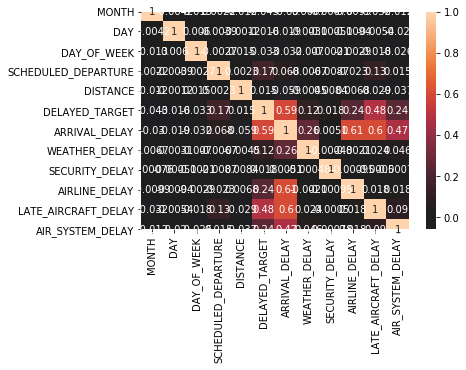

In [8]:
features = ['MONTH',                    
            'DAY',                      
            'DAY_OF_WEEK',                 
            'SCHEDULED_DEPARTURE',            
            'DISTANCE',
            'DELAYED_TARGET',
            'ARRIVAL_DELAY',
            'WEATHER_DELAY',
            'SECURITY_DELAY',
            'AIRLINE_DELAY',
            'LATE_AIRCRAFT_DELAY',
            'AIR_SYSTEM_DELAY']
            
target = df['DELAYED_TARGET']
df = df[features].copy()
sns.heatmap(df.corr(), center=0, annot=True);

In [46]:
df.shape

(51376, 12)

In [51]:
51376/5

10275.2

### Log Reg

In [10]:
# scaler
from sklearn.preprocessing import StandardScaler

# cross validation
from sklearn.model_selection import train_test_split, cross_val_score, \
    cross_validate, cross_val_predict, KFold, GridSearchCV

In [ ]:
# set random seed, to be used for the whole project for reproducability
random_seed = 54321
np.random.seed(random_seed)

# set cross-validation, to be kept fixed
cv = KFold(n_splits = 5, shuffle = True, random_state = random_seed)

X = df.drop('DELAYED_TARGET', axis = 1) #Features
y = df['DELAYED_TARGET'] #Target variable

In [52]:
# splitting first for train - test
X_train_logreg, X_test_logreg, y_train_logreg, y_test_logreg = \
    train_test_split(
        X, y, test_size=10275, random_state = random_seed
    )

# then, splitting for train - validation
X_train_logreg, X_valid_logreg, y_train_logreg, y_valid_logreg = \
    train_test_split(
        X_train_logreg, y_train_logreg, test_size = 10275, random_state = random_seed
    )

# finally, scaling
scaler_logreg = StandardScaler()
X_train_logreg = scaler_logreg.fit_transform(X_train_logreg)

X_valid_logreg = scaler_logreg.transform(X_valid_logreg)
X_test_logreg = scaler_logreg.transform(X_test_logreg)

In [55]:
# not sure about the cost ratio
prevalence = sum(y_train_logreg) / len(y_train_logreg)
cost_ratio = 0.5/1
m = (1 - prevalence) / prevalence * cost_ratio
m

2.5038978756577666

In [56]:
logreg = LogisticRegression(solver='liblinear')

In [57]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_cv_score = cross_val_score(dt_clf, X_train_logreg, y_train_logreg, cv=3)
mean_dt_cv_score = np.mean(dt_cv_score)

print(f"Mean Cross Validation Score: {mean_dt_cv_score :.2%}")

Mean Cross Validation Score: 92.52%


### GSCV Iteration #1: Change parameters based on results

https://chrisalbon.com/machine_learning/model_selection/hyperparameter_tuning_using_grid_search/

In [18]:
# using order of magnitude search parameters
# convergence warning for [100,1000]
# penalty = 11: Lasso, 12: Ridge
param_grid = {
    'C':[1, 10, 10**2], 
    'max_iter':[1000, 2000],
    'penalty': ['l1', 'l2']
}

gs_log = GridSearchCV(logreg, param_grid, scoring = 'roc_auc', cv = cv)

gs_log.fit(X_train_logreg, y_train_logreg)

C:\Users\User1\Anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


GridSearchCV(cv=KFold(n_splits=5, random_state=54321, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [1, 10, 100], 'max_iter': [1000, 2000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

https://stackoverflow.com/questions/52670012/convergencewarning-liblinear-failed-to-converge-increase-the-number-of-iterati

In [58]:
gs_log.best_score_

0.9671003503627992

In [59]:
gs_log.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
print("Best estimator of C is : " + str(gs_log.best_estimator_.C))
print("Best estimator of max_iterations is : " + str(gs_log.best_estimator_.max_iter))
print("Best estimator of penalty is : " + str(gs_log.best_estimator_.penalty))

Best estimator of C is : 1
Best estimator of max_iterations is : 1000
Best estimator of max_iterations is : l2


In [167]:
def best_estimator_notebook(model):
    '''Returns the best estimator of/ C/ penalty
    '''
       
    C_best = model.best_estimator_.C
    max_iter_best = model.best_estimator_.max_iter
    penalty_best = model.best_estimator_.penalty
        
    print("Best estimator of C is : " + str(C_best))
    print("Best estimator of max_iterations is : " + str(max_iter_best))
    print("Best estimator of penalty is : " + str(penalty_best))

    return C_best , max_iter_best, penalty_best


In [168]:
from clockwork_orange import best_estimator
best_estimator(gs_log)

Best estimator of C is : 1
Best estimator of max_iterations is : 1000
Best estimator of penalty is : l2


(1, 1000, 'l2')

In [159]:
best_estimator(gs_log_2)

Best estimator of C is : 0.1
Best estimator of max_iterations is : 500
Best estimator of penalty is : l2


(0.1, 500, 'l2')

In [160]:
best_estimator(gs_log_3)

Best estimator of C is : 0.1
Best estimator of max_iterations is : 100
Best estimator of penalty is : l2


(0.1, 100, 'l2')

### GSCV Iteration #2

In [60]:
# using C of magnitude around 1
# using max iterations +/- 500 from 1000

param_grid = {
    'C':[0.1, 0.5, 1, 5], 
    'max_iter':[500, 1000, 1500],  #iterations increased
    'penalty': ['l1', 'l2']
}

gs_log_2 = GridSearchCV(logreg, param_grid, scoring = 'roc_auc', cv = cv)

gs_log_2.fit(X_train_logreg, y_train_logreg)

GridSearchCV(cv=KFold(n_splits=5, random_state=54321, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.5, 1, 5], 'max_iter': [500, 1000, 1500],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [67]:
gs_log_2.best_score_

0.9680502234518092

In [68]:
gs_log_2.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
print("Best estimator of C is : " + str(gs_log_2.best_estimator_.C))
print("Best estimator of max_iterations is : " + str(gs_log_2.best_estimator_.max_iter))
print("Best estimator of max_iterations is : " + str(gs_log_2.best_estimator_.penalty))

Best estimator of C is : 0.1
Best estimator of max_iterations is : 500
Best estimator of max_iterations is : l2


### Third Iteration

In [69]:
# using C of magnitude around 0.1
# using max iterations +/- 200 from 500

param_grid = {
    'C':[0.01, 0.1, 0.25], 
    'max_iter':[100, 200, 300, 500],  #iterations increased
    'penalty': ['l1', 'l2']
}

gs_log_3 = GridSearchCV(logreg, param_grid, scoring = 'roc_auc', cv = cv)

gs_log_3.fit(X_train_logreg, y_train_logreg)

GridSearchCV(cv=KFold(n_splits=5, random_state=54321, shuffle=True),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='liblinear',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 0.25],
                         'max_iter': [100, 200, 300, 500],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [70]:
gs_log_3.best_score_

0.9680502234518092

In [71]:
gs_log_3.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Prefix selected parameters with chosen_ for goodhousekeeping

In [78]:
print("Best estimator of C is : " + str(gs_log_3.best_estimator_.C))
print("Best estimator of max_iterations is : " + str(gs_log_3.best_estimator_.max_iter))
print("Best estimator of max_iterations is : " + str(gs_log_3.best_estimator_.penalty))

Best estimator of C is : 0.1
Best estimator of max_iterations is : 100
Best estimator of max_iterations is : l2


In [79]:
chosen_C = gs_log_3.best_estimator_.C
chosen_max_iter = gs_log_3.best_estimator_.max_iter
chosen_penalty = gs_log_3.best_estimator_.penalty

## Fitting the Chosen Model & Threshold Selection

In [82]:
logreg_chosen = LogisticRegression(
    C = chosen_C, max_iter = chosen_max_iter, penalty = chosen_penalty, solver = 'liblinear'
    )

logreg_chosen.fit(X_train_logreg, y_train_logreg)

y_train_prediction_probabilities_logreg = logreg_chosen.predict_proba(X_train_logreg)

fpr_train_logreg, tpr_train_logreg, thresholds_train_logreg = \
    roc_curve(y_train_logreg, y_train_prediction_probabilities_logreg[:,1])

auc(fpr_train_logreg, tpr_train_logreg)

0.9682362423629152

### Threshold Selection

In [84]:
#this contains m. DOUBLE CHECK choice of cost function

zweig_campbell_scores_train_logreg = \
    tpr_train_logreg - m * fpr_train_logreg

chosen_threshold_logreg = \
    thresholds_train_logreg[np.argmax(zweig_campbell_scores_train_logreg)]

chosen_threshold_logreg

0.32207342262679606

In [85]:
# validation
y_valid_prediction_probabilities_logreg = \
    logreg_chosen.predict_proba(X_valid_logreg)

fpr_valid_logreg, tpr_valid_logreg, thresholds_valid_logreg = \
    roc_curve(y_valid_logreg, y_valid_prediction_probabilities_logreg[:,1])

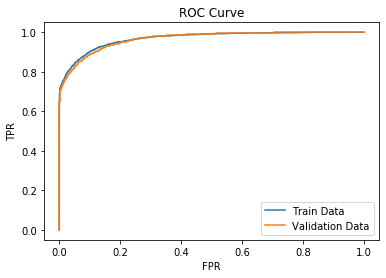

In [86]:
#visualization
plt.plot(fpr_train_logreg, tpr_train_logreg, label = 'Train Data')
plt.plot(fpr_valid_logreg, tpr_valid_logreg, label = 'Validation Data')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [87]:
# for a given threshold
y_valid_prediction_logreg = \
    (y_valid_prediction_probabilities_logreg[:,1] > chosen_threshold_logreg) * 1

In [91]:
from sklearn.metrics import SCORERS, precision_score, recall_score, \
    accuracy_score, f1_score, roc_curve, auc, confusion_matrix, roc_auc_score


print(accuracy_score(y_train_true, y_train_pred))

NameError: name 'y_train_true' is not defined

In [89]:
# Scores on the doors => returm he scoring processes

import pandas as pd
import numpy as np

from sklearn.metrics import SCORERS, precision_score, recall_score, \
    accuracy_score, f1_score, roc_curve, auc, confusion_matrix, roc_auc_score



def calculate_scores(y_train_true, y_train_pred, y_valid_true, y_valid_pred, m, verbose = False):
    """
    calculates scores, updates dictionary with relevant scores
    if verbose is true, also prints out results
    returns a dictionary
    """
    
    scoring_dictionary = {}
    
    scoring_dictionary['train_accuracy'] = accuracy_score(y_train_true, y_train_pred)
    scoring_dictionary['validation_accuracy'] = accuracy_score(y_valid_true, y_valid_pred)
    scoring_dictionary['train_f1'] = f1_score(y_train_true, y_train_pred)
    scoring_dictionary['validation_f1'] = f1_score(y_valid_true, y_valid_pred)
    scoring_dictionary['train_auc'] = roc_auc_score(y_train_true, y_train_pred)
    scoring_dictionary['validation_auc'] = roc_auc_score(y_valid_true, y_valid_pred)
    scoring_dictionary['train_zweigcampbell'] = \
        calculate_zweig_campbell_score(y_train_true, y_train_pred, m)
    scoring_dictionary['validation_zweigcampbell'] = \
        calculate_zweig_campbell_score(y_valid_true, y_valid_pred, m)
    
    if verbose:
        print("Train accuracy : " + str(scoring_dictionary['train_accuracy']))
        print("Validation accuracy : " + str(scoring_dictionary['validation_accuracy']))
        print("Train F1 : " + str(scoring_dictionary['train_f1']))
        print("Validation F1 : " + str(scoring_dictionary['validation_f1']))
        print("Train AUC : " + str(scoring_dictionary['train_auc']))
        print("Validation AUC : " + str(scoring_dictionary['validation_auc']))
        print("Train Zweig-Campbell : " + str(scoring_dictionary['train_zweigcampbell']))
        print("Validation Zweig-Campbell : " + str(scoring_dictionary['validation_zweigcampbell']))
        
    return scoring_dictionary
    
    
def calculate_zweig_campbell_score(y_true, y_pred, m):
    """
    calculates tpr - m * fpr
    """
    
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    fpr = fp / (fp + tn)
    tpr = tp / (tp + fn)

    return tpr - fpr * m

ModuleNotFoundError: No module named 'modelling_func'